In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# open dfs
bact_f = pd.read_table('proteobacteria-f_fitch_g-b.txt')
bact_g = pd.read_table('proteobacteria-g_fitch_g-b.txt')
fun = pd.read_table('fungi_fitch_g-b.txt')
euk = pd.read_table('eukaryota_fitch_g-b.txt')
archaea = pd.read_table('archaea_fitch_g-b.txt')

# merging all DFs
frames = [archaea, fun, euk, bact_f, bact_g]
dataset_initial = pd.concat(frames)
dataset_initial['division'] = dataset_initial['division'].map({'good':1, 'bad':0})

In [3]:
y = dataset_initial[['division']]
y_arr = y.values.ravel()

dataset = dataset_initial.iloc[:, 1:-1]

In [16]:
features = dataset.columns

In [5]:
#divide dataset into 5 groups by initial data: 

#5 groups
y_archaea = y_arr[pd.Series(dataset_initial['ID']).str.startswith('A')]
y_fungi = y_arr[pd.Series(dataset_initial['ID']).str.startswith('F')]
y_euk = y_arr[pd.Series(dataset_initial['ID']).str.startswith('E')]
y_bf = y_arr[pd.Series(dataset_initial['ID']).str.startswith('Pf')]
y_bg = y_arr[pd.Series(dataset_initial['ID']).str.startswith('Pg')]

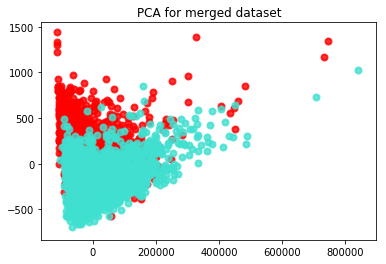

In [6]:
#PCA for merged data, for 2
pca = PCA(n_components=2)
X = pca.fit(dataset).transform(dataset)

plt.figure()
colors = ['red', 'turquoise']
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(X[y_arr == i, 0], X[y_arr == i, 1], color=color, alpha=.8, lw=lw)

plt.title("PCA for merged dataset")
#plt.legend(colors, ['Bad', 'Good'])
plt.show()

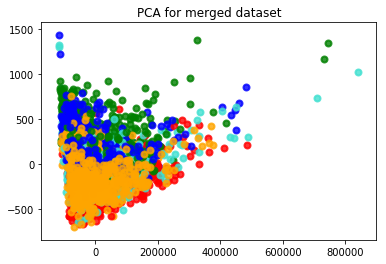

In [7]:
#5groups PCA

pca = PCA(n_components=2)
X = pca.fit(dataset).transform(dataset)

dataset_archaea = X[pd.Series(dataset_initial['ID']).str.startswith('A')]
dataset_fungi = X[pd.Series(dataset_initial['ID']).str.startswith('F')]
dataset_euk = X[pd.Series(dataset_initial['ID']).str.startswith('E')]
dataset_bf = X[pd.Series(dataset_initial['ID']).str.startswith('Pf')]
dataset_bg = X[pd.Series(dataset_initial['ID']).str.startswith('Pg')]

plt.figure()
colors = ['red', 'turquoise', 'green', 'blue', 'orange']
lw = 2

for i in [0, 1]:
    plt.scatter(dataset_archaea[y_archaea == i, 0], dataset_archaea[y_archaea == i, 1], color=colors[0], alpha=.8, lw=lw)
    plt.scatter(dataset_fungi[y_fungi == i, 0], dataset_fungi[y_fungi == i, 1], color=colors[1], alpha=.8, lw=lw)
    plt.scatter(dataset_euk[y_euk == i, 0], dataset_euk[y_euk == i, 1], color=colors[2], alpha=.8, lw=lw)
    plt.scatter(dataset_bf[y_bf == i, 0], dataset_bf[y_bf == i, 1], color=colors[3], alpha=.8, lw=lw)
    plt.scatter(dataset_bg[y_bg == i, 0], dataset_bg[y_bg == i, 1], color=colors[4], alpha=.8, lw=lw)

plt.title("PCA for merged dataset")
plt.show()


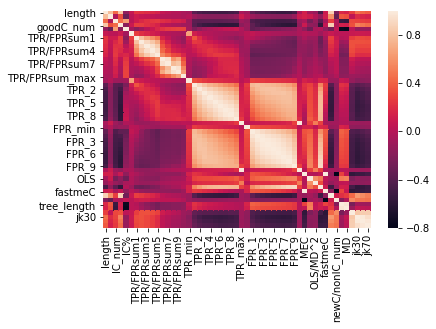

In [33]:
#heatmap with correlations btw features

correlations = np.corrcoef(dataset.T)
cor_matrix = pd.DataFrame(data = correlations, index=features, columns=features)

import seaborn as sns

sns.heatmap(cor_matrix)
plt.show()